## Problem 4

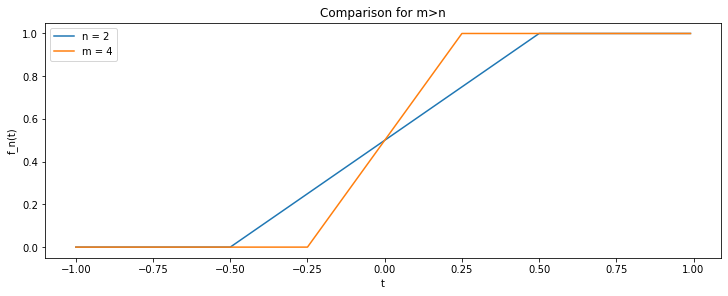

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def f_n_t(n,t):
    if t < -1/n:
        return 0
    elif t <= 1/n:
        return n*(t/2) + 1/2
    else: #t > 1/n
        return 1

t = np.arange(-1.0,1.0,0.01)
x_n = np.zeros(t.size)
x_m = np.zeros(t.size)

n = 2
m = 4
for i in range(0,t.size):
    x_n[i] = f_n_t(n,t[i])
    x_m[i] = f_n_t(m,t[i])

#plot the data
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
ax.plot(t, x_n, label='n = 2')  # Plot some data on the axes.
ax.plot(t, x_m, label='m = 4')  # Plot more data on the axes...
ax.set_xlabel('t')  # Add an x-label to the axes.
ax.set_ylabel('f_n(t)')  # Add a y-label to the axes.
ax.set_title("Comparison for m>n")  # Add a title to the axes.
ax.legend();  # Add a legend.

## Problem 6B

In [8]:
def g(x,root_to_solve):
    """ Compute g(x) when solving for a specific root

    Args:
        x (float): value to compute g(x) for
        root_to_solve (float): the root the function is solving for (ex: 9 for (sqrt(9))
    """

    return (x * x) - root_to_solve

def g_prime(x):
    """ Compute and return the derrivative of g(x)

    Args:
        x (float): value to compute g'(x) for
    """

    return 2 * x

def f(x_n,root_to_solve):
    """ Compute f(x_n)

    Args:
        x_n (float): the value to compute f(x_n) for
        root_to_solve (float): the root the function is solving for (ex: 9 for (sqrt(9))
    """

    return x_n - (g(x_n,root_to_solve)/g_prime(x_n))

def f_prime(x_n,root_to_solve):
    """Compute f'(x_n)

    Args:
        x_n (float): the value to compute f(x_n) for
        root_to_solve (float): the root the function is solving for (ex: 9 for (sqrt(9))
    """

    return (1/2) - (root_to_solve/(2*x_n*x_n))

def compute_gamma(root_to_solve):
    """Compute a value for gamma

    Args:
        root_to_solve (float): the root the function is solving for (ex: 9 for (sqrt(9))
    """
    return f_prime(root_to_solve,root_to_solve)

def sqrt_solve(root_to_solve, tolerance):
    """ Solve for the square root of the given value using Newton's method for the given tolerance

    Args:
        root_to_solve (float): the value to obtain the square root of
        tolerance (float): the tolerance to solve within
    """

    #initialize x_1 = root_to_solve to be the first x_n
    x_n = root_to_solve
    x_n_plus_1 = f(x_n,root_to_solve)
    
    #initialize gamma
    gamma = compute_gamma(root_to_solve)

    #check if solved on the first iteration
    if ((x_n - x_n_plus_1) * gamma/(1 - gamma)) <= tolerance:
        solved = True
    else:
        solved = False

    #loop until solved
    while not solved:
        x_n = x_n_plus_1
        x_n_plus_1 = f(x_n,root_to_solve)

        #check if solved
        if ((x_n - x_n_plus_1) * gamma/(1 - gamma)) <= tolerance:
            solved = True
        else:
            solved = False
    
    return x_n_plus_1

root_2 = sqrt_solve(root_to_solve=2,tolerance= 10 ** (-3))
root_3 = sqrt_solve(root_to_solve=3,tolerance= 10 ** (-3))
root_4 = sqrt_solve(root_to_solve=4,tolerance= 10 ** (-3))

txt = "sqrt(2) = {}\nsqrt(3) = {}\nsqrt(4) = {}\n".format(root_2,root_3,root_4)
print(txt)

sqrt(2) = 1.4142156862745099
sqrt(3) = 1.7320508100147276
sqrt(4) = 2.0000000929222947

